# Getting started with H2O

https://www.kaggle.com/sudalairajkumar/getting-started-with-h2o

In [4]:
import h2o
import time
import seaborn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

%matplotlib inline

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O cluster uptime:         11 hours 15 mins
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.28.0.3
H2O cluster version age:    12 days
H2O cluster name:           H2O_from_python_rajaharsha_chinta_4676zh
H2O cluster total nodes:    1
H2O cluster free memory:    3.058 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:       {'http': None, 'https': None}
H2O internal security:      False
H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python version:             3.7.3 final
--------------------------  ------------------------------------------------------------------

In [7]:
diabetes_df = h2o.import_file("./input/diabetes.csv", destination_frame="diabetes_df")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
diabetes_df.describe()

Rows:768
Cols:9




Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age Outcome 
 
 
 type int int int int int real real int int 
 mins 0.0 0.0 0.0 0.0 0.0 0.0 0.078 21.0 0.0 
 mean 3.845052083333336 120.89453125 69.10546874999994 20.536458333333357 79.79947916666666 31.99257812500003 0.4718763020833334 33.240885416666615 0.3489583333333333 
 maxs 17.0 199.0 122.0 99.0 846.0 67.1 2.42 81.0 1.0 
 sigma 3.36957806269887 31.972618195136224 19.355807170644777 15.952217567727642 115.24400235133803 7.884160320375441 0.331328595012775 11.760231540678689 0.47695137724279896 
 zeros 111 5 35 227 374 11 0 0 500 
 missing 0 0 0 0 0 0 0 0 0 
 0 6.0 148.0 72.0 35.0 0.0 33.6 0.627 50.0 1.0 
 1 1.0 85.0 66.0 29.0 0.0 26.6 0.351 31.0 0.0 
 2 8.0 183.0 64.0 0.0 0.0 23.3 0.672 32.0 1.0 
 3 1.0 89.0 66.0 23.0 94.0 28.1 0.167 21.0 0.0 
 4 0.0 137.0 40.0 35.0 168.0 43.1 2.288 33.0 1.0 
 5 5.0 116.0 74.0 0.0 0.0 25.6 0.201 30.0 0.0 
 6 3.0 78.0 50.0 32.0 88.0 31.0 0.248 26.0 1.0 
 7 10.0 115.0 0.0 0.0 0.0 35.3 0.134 29.0 0.0 
 8 2.0 197.0 70.0 45.0 543.0 30.5 0.158 53.0 1.0 
 9 8.0 125.0 96.0 0.0 0.0 0.0 0.232 54.0 1.0

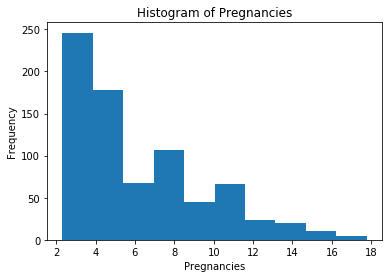

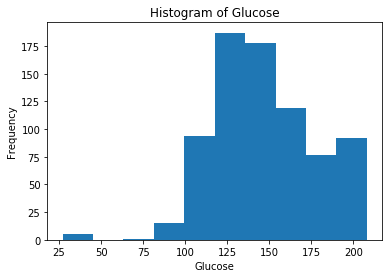

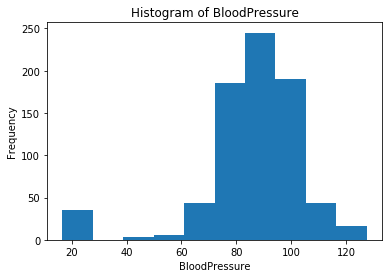

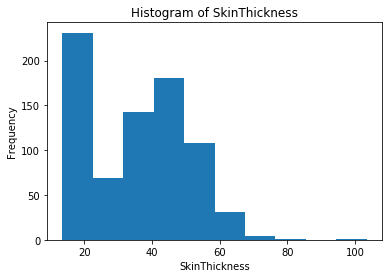

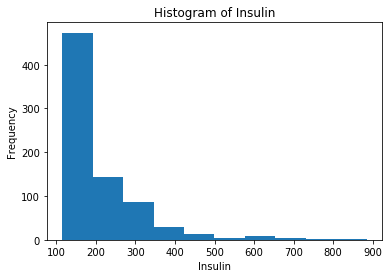

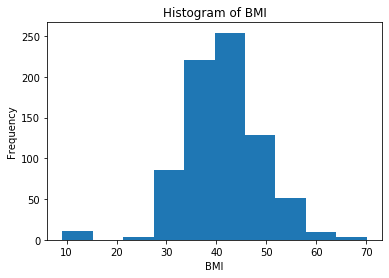

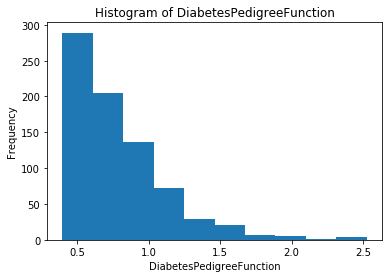

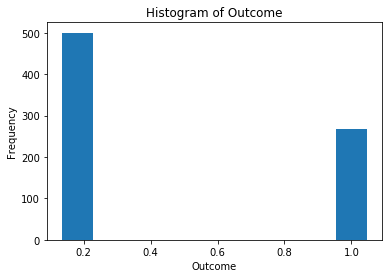

In [9]:
for col in diabetes_df.columns:
    diabetes_df[col].hist()

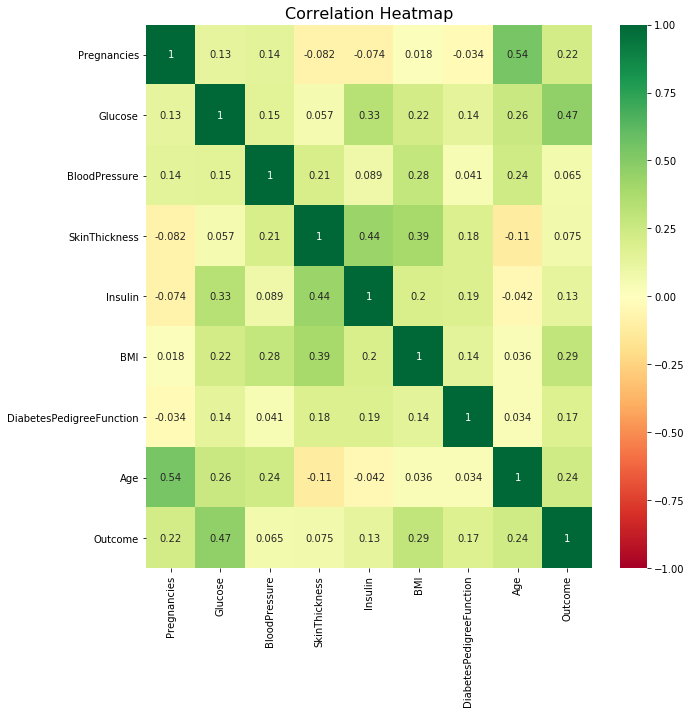

In [10]:
plt.figure(figsize=(10,10))
corr = diabetes_df.cor().as_data_frame()
corr.index = diabetes_df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [11]:
train, valid, test = diabetes_df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  465 148 155


In [12]:
predictors = diabetes_df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [13]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1581950722360_23774


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               50.0                      50.0              11547.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        5.0        5.0         5.0         6.0        23.0        13.68



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05394537414652564
RMSE: 0.2322614349101582
LogLoss: 0.21164045617145613
Mean Per-Class Error: 0.05419671999032927
AUC: 0.9899262602248459
AUCPR: 0.9784923662885114
Gini: 0.9798525204496917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46220528851885034: 


0      1   Error           Rate
0      0  290.0    9.0  0.0301    (9.0/299.0)
1      1   14.0  152.0  0.0843   (14.0/166.0)
2  Total  304.0  161.0  0.0495   (23.0/465.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.462205    0.929664  150.0
1                        max f2   0.323826    0.944836  176.0
2                  max f0point5   0.548022    0.967302  132.0
3                  max accuracy   0.506976    0.950538  142.0
4                 max precision   0.983850    1.000000    0.0
5                    max recall   0.173383    1.000000  227.0
6               max specificity   0.983850    1.000000    0.0
7              max absolute_mcc   0.506976    0.892066  142.0
8    max min_per_class_accuracy   0.372134    0.939799  163.0
9   max mean_per_class_accuracy   0.370458    0.945803  164.0
10                      max tns   0.983850  299.000000    0.0
11                      max fns   0.983850  165.000000    0.0
12                      max fps   0.018713  299.000000  399.0
13                      max tps   0.173383  166.000000  227.0
14                      max tnr   0.983850    1.000000    0.0
15                      max fnr   0.983850    0.993976    0.0
16                      max fpr   0.018713    1.000000  399.0
17                      max tpr   0.173383    1.000000  227.0


Gains/Lift Table: Avg response rate: 35.70 %, avg score: 35.71 %


group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.010753         0.964760  2.801205   
1         2                  0.021505         0.959842  2.801205   
2         3                  0.030108         0.948198  2.801205   
3         4                  0.040860         0.944016  2.801205   
4         5                  0.051613         0.940243  2.801205   
5         6                  0.101075         0.910936  2.801205   
6         7                  0.150538         0.868553  2.801205   
7         8                  0.200000         0.797054  2.801205   
8         9                  0.301075         0.556327  2.801205   
9        10                  0.400000         0.326087  1.157019   
10       11                  0.501075         0.189518  0.357601   
11       12                  0.600000         0.119706  0.060896   
12       13                  0.698925         0.083724  0.000000   
13       14                  0.800000         0.053134  0.000000   
14       15                  0.898925         0.034204  0.000000   
15       16                  1.000000         0.018713  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.801205       1.000000  0.970134                  1.000000   
1          2.801205       1.000000  0.963441                  1.000000   
2          2.801205       1.000000  0.952824                  1.000000   
3          2.801205       1.000000  0.946246                  1.000000   
4          2.801205       1.000000  0.942268                  1.000000   
5          2.801205       1.000000  0.924669                  1.000000   
6          2.801205       1.000000  0.889815                  1.000000   
7          2.801205       1.000000  0.834641                  1.000000   
8          2.801205       1.000000  0.680179                  1.000000   
9          2.394578       0.413043  0.441848                  0.854839   
10         1.983686       0.127660  0.257074                  0.708155   
11         1.666667       0.021739  0.148143                  0.594982   
12         1.430769       0.000000  0.101152                  0.510769   
13         1.250000       0.000000  0.067558                  0.446237   
14         1.112440       0.000000  0.042448                  0.397129   
15         1.000000       0.000000  0.026483                  0.356989   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.970134      0.030120                 0.030120  180.120482   
1           0.966788      0.030120                 0.060241  180.120482   
2           0.962798      0.024096                 0.084337  180.120482   
3           0.958442      0.030120                 0.114458  180.120482   
4           0.955073      0.030120                 0.144578  180.120482   
5           0.940194      0.138554                 0.283133  180.120482   
6           0.923641      0.138554                 0.421687  180.120482   
7           0.901630      0.138554                 0.560241  180.120482   
8           0.827286      0.283133                 0.843373  180.120482   
9           0.731963      0.114458                 0.957831   15.701938   
10          0.636170      0.036145                 0.993976  -64.239938   
11          0.555707      0.006024                 1.000000  -93.910424   
12          0.491370      0.000000                 1.000000 -100.000000   
13          0.437824      0.000000                 1.000000 -100.000000   
14          0.394313      0.000000                 1.000000 -100.000000   
15          0.357135      0.000000                 1.000000 -100.000000   

    cumulative_gain  
0        180.120482  
1        180.120482  
2        180.120482  
3        180.120482  
4        180.120482  
5        180.120482  
6        180.120482  
7        180.120482  
8        180.120482  
9        139.457831  
10        98.368582  
11        66.666667  
12        43.076923  
13    



Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-02-17 21:06:58   0.008 sec              0.0       0.479112   
1     2020-02-17 21:06:58   0.027 sec              1.0       0.456602   
2     2020-02-17 21:06:58   0.032 sec              2.0       0.437174   
3     2020-02-17 21:06:58   0.035 sec              3.0       0.420575   
4     2020-02-17 21:06:58   0.037 sec              4.0       0.405987   
5     2020-02-17 21:06:58   0.041 sec              5.0       0.392586   
6     2020-02-17 21:06:58   0.043 sec              6.0       0.380476   
7     2020-02-17 21:06:58   0.045 sec              7.0       0.370456   
8     2020-02-17 21:06:58   0.047 sec              8.0       0.362031   
9     2020-02-17 21:06:58   0.049 sec              9.0       0.355361   
10    2020-02-17 21:06:58   0.051 sec             10.0       0.346859   
11    2020-02-17 21:06:58   0.053 sec             11.0       0.340863   
12    2020-02-17 21:06:58   0.055 sec             12.0       0.335607   
13    2020-02-17 21:06:58   0.057 sec             13.0       0.329409   
14    2020-02-17 21:06:58   0.059 sec             14.0       0.324769   
15    2020-02-17 21:06:58   0.061 sec             15.0       0.320250   
16    2020-02-17 21:06:58   0.063 sec             16.0       0.315399   
17    2020-02-17 21:06:58   0.066 sec             17.0       0.310275   
18    2020-02-17 21:06:58   0.068 sec             18.0       0.305461   
19    2020-02-17 21:06:58   0.071 sec             19.0       0.301918   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.651666      0.500000         0.000000       1.000000   
1           0.606210      0.899111         0.572683       2.801205   
2           0.568855      0.918050         0.669955       2.801205   
3           0.537898      0.919994         0.672056       2.801205   
4           0.511169      0.925938         0.840134       2.801205   
5           0.486722      0.934239         0.876386       2.801205   
6           0.464792      0.937936         0.881787       2.801205   
7           0.446541      0.939205         0.883794       2.801205   
8           0.431383      0.942207         0.900589       2.801205   
9           0.418882      0.941834         0.901214       2.801205   
10          0.403572      0.945400         0.908120       2.801205   
11          0.392730      0.947445         0.912114       2.801205   
12          0.382817      0.949037         0.914348       2.801205   
13          0.371826      0.951445         0.918488       2.801205   
14          0.363182      0.952946         0.921111       2.801205   
15          0.354856      0.954527         0.923876       2.801205   
16          0.346112      0.956361         0.927041       2.801205   
17          0.337092      0.958123         0.929884       2.801205   
18          0.328962      0.960440         0.933645       2.801205   
19          0.322548      0.961428         0.935008       2.801205   

    training_classification_error  
0                        0.643011  
1                        0.178495  
2                        0.154839  
3                        0.156989  
4                        0.148387  
5                        0.141935  
6                        0.141935  
7                        0.139785  
8                        0.133333  
9                        0.133333  
10                       0.144086  
11                       0.133333  
12                       0.131183  
13                       0.144086  
14                       0.133333  
15                       0.122581  
16                       0.111828  
17                       0.105376  
18                       0.103226  
19                       0.103226


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  \
0                   Glucose           160.889725           1.000000   
1                       BMI           107.157028           0.666028   
2  DiabetesPedigreeFunction            49.382526           0.306934   
3                       Age            28.789474           0.178939   
4             BloodPressure            24.516136           0.152379   
5               Pregnancies            22.055462           0.137084   
6                   Insulin            12.949581           0.080487   
7             SkinThickness            10.949017           0.068053   

   percentage  
0    0.386115  
1    0.257163  
2    0.118512  
3    0.069091  
4    0.058836  
5    0.052930  
6    0.031077  
7    0.026276

In [14]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.18115330538099383
RMSE: 0.4256210819273334
LogLoss: 0.5366686568411096
Mean Per-Class Error: 0.25621588841722254
AUC: 0.804932282191227
AUCPR: 0.6269893119126704
Gini: 0.6098645643824541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1458393490707833: 


0     1   Error           Rate
0      0  53.0  44.0  0.4536    (44.0/97.0)
1      1   3.0  48.0  0.0588     (3.0/51.0)
2  Total  56.0  92.0  0.3176   (47.0/148.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold      value    idx
0                        max f1   0.145839   0.671329   91.0
1                        max f2   0.112531   0.819936  106.0
2                  max f0point5   0.668426   0.642458   31.0
3                  max accuracy   0.668426   0.750000   31.0
4                 max precision   0.980739   1.000000    0.0
5                    max recall   0.112531   1.000000  106.0
6               max specificity   0.980739   1.000000    0.0
7              max absolute_mcc   0.145839   0.477769   91.0
8    max min_per_class_accuracy   0.328581   0.686275   64.0
9   max mean_per_class_accuracy   0.145839   0.743784   91.0
10                      max tns   0.980739  97.000000    0.0
11                      max fns   0.980739  50.000000    0.0
12                      max fps   0.019964  97.000000  147.0
13                      max tps   0.112531  51.000000  106.0
14                      max tnr   0.980739   1.000000    0.0
15                      max fnr   0.980739   0.980392    0.0
16                      max fpr   0.019964   1.000000  147.0
17                      max tpr   0.112531   1.000000  106.0


Gains/Lift Table: Avg response rate: 34.46 %, avg score: 36.45 %


group  cumulative_data_fraction  lower_threshold      lift  \
0         1                  0.013514         0.973098  1.450980   
1         2                  0.020270         0.966872  2.901961   
2         3                  0.033784         0.952356  2.901961   
3         4                  0.040541         0.927994  2.901961   
4         5                  0.054054         0.923162  1.450980   
5         6                  0.101351         0.892244  2.072829   
6         7                  0.155405         0.836001  2.176471   
7         8                  0.202703         0.722515  1.658263   
8         9                  0.304054         0.517149  1.547712   
9        10                  0.398649         0.409838  1.036415   
10       11                  0.500000         0.255816  0.967320   
11       12                  0.601351         0.146848  1.354248   
12       13                  0.695946         0.115818  0.621849   
13       14                  0.797297         0.062397  0.386928   
14       15                  0.898649         0.039886  0.000000   
15       16                  1.000000         0.019964  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.450980       0.500000  0.977228                  0.500000   
1          1.934641       1.000000  0.972400                  0.666667   
2          2.321569       1.000000  0.963776                  0.800000   
3          2.418301       1.000000  0.939870                  0.833333   
4          2.176471       0.500000  0.925415                  0.750000   
5          2.128105       0.714286  0.906349                  0.733333   
6          2.144928       0.750000  0.861825                  0.739130   
7          2.031373       0.571429  0.773092                  0.700000   
8          1.870153       0.533333  0.605657                  0.644444   
9          1.672316       0.357143  0.461534                  0.576271   
10         1.529412       0.333333  0.314072                  0.527027   
11         1.499890       0.466667  0.196076                  0.516854   
12         1.380544       0.214286  0.134532                  0.475728   
13         1.254237       0.133333  0.091193                  0.432203   
14         1.112782       0.000000  0.049685                  0.383459   
15         1.000000       0.000000  0.030207                  0.344595   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.977228      0.019608                 0.019608   45.098039   
1           0.975618      0.019608                 0.039216  190.196078   
2           0.970881      0.039216                 0.078431  190.196078   
3           0.965713      0.019608                 0.098039  190.196078   
4           0.955638      0.019608                 0.117647   45.098039   
5           0.932637      0.098039                 0.215686  107.282913   
6           0.908006      0.117647                 0.333333  117.647059   
7           0.876527      0.078431                 0.411765   65.826331   
8           0.786237      0.156863                 0.568627   54.771242   
9           0.709188      0.098039                 0.666667    3.641457   
10          0.629097      0.098039                 0.764706   -3.267974   
11          0.556116      0.137255                 0.901961   35.424837   
12          0.498813      0.058824                 0.960784  -37.815126   
13          0.446997      0.039216                 1.000000  -61.307190   
14          0.402188      0.000000                 1.000000 -100.000000   
15          0.364487      0.000000                 1.000000 -100.000000   

    cumulative_gain  
0         45.098039  
1         93.464052  
2        132.156863  
3        141.830065  
4        117.647059  
5        112.810458  
6        114.492754  
7        103.137255  
8         87.015251  
9         67.231638  
10        52.941176  
11        49.988984  
12        38.054445  
13    

In [15]:
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [16]:
gbm_tune.model_performance(valid).auc()

0.8019001414998989

In [17]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [18]:
print(grid)

    max_depth           model_ids             logloss
0          10  depth_grid_model_4  0.5610332739005056
1          12  depth_grid_model_5  0.5610431620153586
2           8  depth_grid_model_3  0.5618675574114658
3           6  depth_grid_model_2  0.5688369200105283
4           4  depth_grid_model_1  0.5720338350452505



In [19]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0          10  depth_grid_model_4  0.8067515666060238
1          12  depth_grid_model_5  0.8067515666060238
2           8  depth_grid_model_3  0.8033151404891854
3           6  depth_grid_model_2  0.8031129977764302
4           4  depth_grid_model_1  0.7984637153830605



In [20]:
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

gbm Model Build progress: |███████████████████████████████████████████████| 100%


mean           sd  cv_1_valid  cv_2_valid  \
0                  accuracy   0.8060614  0.028866975  0.81512606  0.84166664   
1                       auc  0.83460003    0.0253348   0.8711854  0.82493657   
2                     aucpr   0.7207207  0.079996586  0.77338797   0.6069972   
3                       err  0.19393861  0.028866975  0.18487395  0.15833333   
4                 err_count        22.5    3.3166249        22.0        19.0   
5                  f0point5   0.7166275  0.023856336   0.7432432   0.6993007   
6                        f1   0.7359389  0.051860016         0.8   0.6779661   
7                        f2  0.75854874  0.086101264  0.86614174  0.65789473   
8            lift_top_group   2.0913858    0.6500798   1.2395834   1.9354838   
9                   logloss   0.4842181   0.03085123  0.46077308  0.45635447   
10      max_per_class_error   0.2667725  0.061059155   0.2535211   0.3548387   
11                      mcc  0.58331674  0.049473092  0.65121645   0.5746587   
12  mean_per_class_accuracy  0.79290384  0.027116295   0.8315728   0.7776368   
13     mean_per_class_error  0.20709616  0.027116295  0.16842723  0.22236317   
14                      mse   0.1554569  0.008760154  0.14931631  0.14733355   
15                   pr_auc   0.7207207  0.079996586  0.77338797   0.6069972   
16                precision   0.7053386  0.017187094   0.7096774  0.71428573   
17                       r2  0.30923334   0.06338601  0.37955743  0.23102464   
18                   recall   0.7757745   0.11168112   0.9166667   0.6451613   
19                     rmse  0.39416355  0.011076028  0.38641468  0.38384053   
20              specificity   0.8100332  0.070176266  0.74647886   0.9101124   

    cv_3_valid  cv_4_valid  
0        0.775   0.7924528  
1   0.81303704   0.8292411  
2    0.7227221   0.7797756  
3        0.225  0.20754717  
4         27.0        22.0  
5    0.6938776   0.7300885  
6    0.7157895        0.75  
7   0.73913044  0.77102804  
8    2.6666667   2.5238094  
9   0.52019364  0.49955118  
10  0.24444444  0.21428572  
11   0.5324516   0.5749401  
12  0.77111113  0.79129463  
13  0.22888888  0.20870535  
14  0.16610987   0.1590679  
15   0.7227221   0.7797756  
16        0.68   0.7173913  
17  0.29126453  0.33508673  
18  0.75555557  0.78571427  
19   0.4075658  0.39883316  
20   0.7866667    0.796875

## XGBoost

In [21]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

xgboost Model Build progress: |███████████████████████████████████████████| 100%


0.7982615726703053

In [22]:
cv_xgb.varimp_plot()

In [23]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
22:15:16.625: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [24]:
lb = aml.leaderboard
lb

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20200217_221516 0.840271 0.469878 0.721554 0.222479 0.389271 0.151532 
 StackedEnsemble_AllModels_AutoML_20200217_221516 0.839727 0.471261 0.719688 0.226488 0.390204 0.152259 
 DRF_1_AutoML_20200217_221516 0.837813 0.673743 0.74468 0.225158 0.390594 0.152563 
 XGBoost_1_AutoML_20200217_221516 0.836503 0.47479 0.727942 0.223486 0.39358 0.154905 
 XGBoost_3_AutoML_20200217_221516 0.835828 0.473197 0.734502 0.22952 0.392457 0.154022 
 XGBoost_2_AutoML_20200217_221516 0.834327 0.483765 0.710173 0.234869 0.397489 0.157998 
 GLM_1_AutoML_20200217_221516 0.831638 0.488798 0.716144 0.238204 0.395915 0.156749 
 GBM_2_AutoML_20200217_221516 0.823921 0.492342 0.72445 0.240198 0.397899 0.158323 
 GBM_1_AutoML_20200217_221516 0.823186 0.499362 0.724222 0.23354 0.398824 0.15906 
 GBM_3_AutoML_20200217_221516 0.822944 0.491874 0.739595 0.245578 0.396877 0.157511

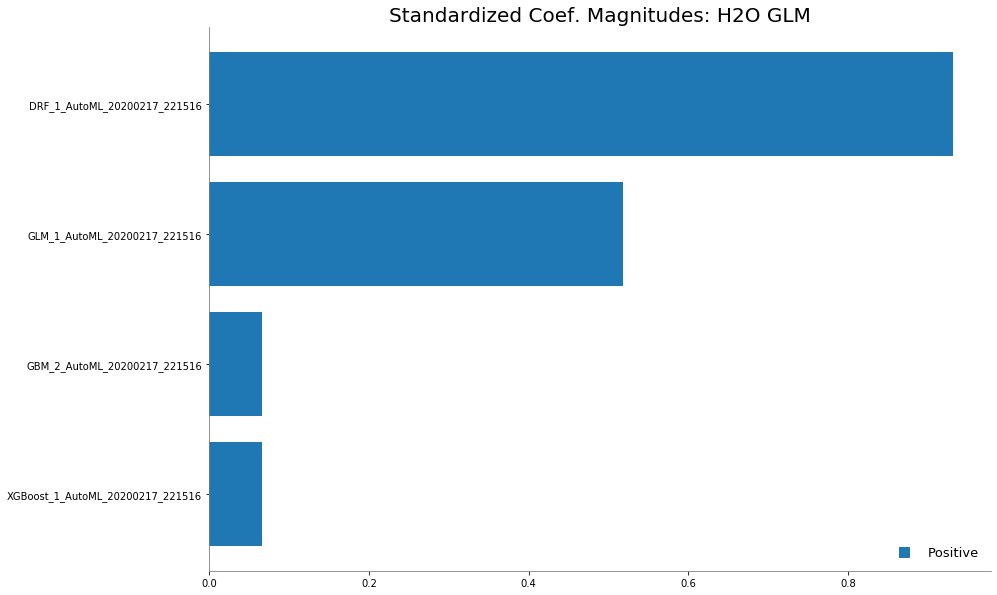

In [25]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()